<a href="https://colab.research.google.com/github/silly-soul/Data-Science/blob/master/LanguageDetectionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import string
import re
import codecs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import glob

In [22]:
#To merge data files into one text file
# read_files = glob.glob("train\English\*")

# with open("english.txt", "wb") as outfile:
#     for f in read_files:
#         with open(f, "rb") as infile:
#             outfile.write(infile.read())

In [23]:
# #to remove html tags
# infile = "english.txt"
# outfile = "train/train/english.txt"
 
# fin = open(infile,encoding="utf8")
# fout = open(outfile, "w+", encoding="utf8")

# for line in fin:
#     line = re.sub(r"<[^>]+>","",line)
#     fout.write(line)
# fin.close()
# fout.close()

In [24]:
#Loading English Data
eng_df = pd.read_csv("english.txt","utf-8",header=None,engine ='python', names=["English"])
eng_df.head()

,English
0,"Tweet text: Putin, on not being included in th..."
1,Video transcription:
2,Audience member: Practically all of the countr...
3,"Putin: (laughing) Listen, it’s offensive!"
4,Several members of the Russian Duma (Assembly)...


In [25]:
#Loading German Data
ger_df =pd.read_csv("german.txt","utf-8",header=None,engine ='python', names=["German"])
ger_df.head()

,German
0,"Rund 4.000 inhaftierte Iraner, die derzeit auf..."
1,Die Anordnung wurde am 9. Januar 2018 vom Leit...
2,"Am 14. Oktober 2017 hat der Wächterrat, welche..."
3,"Dieser Schritt wurde nun unternommen, nach Jah..."
4,Vor der richterlichen Anordnung habe es im Ira...


In [26]:
#Loading French Data
fre_df =pd.read_csv("french.txt","utf-8",header=None,engine ='python', names=["French"])
fre_df.head()

,French
0,"Ana Frenkel, membre de la communauté juive de ..."
1,"Il les a organisé, il allait de maison en mais..."
2,Le blogueur Velimir Mladenovic a cité sur son ...
3,Voici ci-dessous des commentaires sous le bill...
4,Sesili dit :


In [27]:
#Loading Spanish Data
spa_df =pd.read_csv("spanish.txt","utf-8",header=None,engine ='python', names=["Spanish"])
spa_df.head()

,Spanish
0,El periodista marroquí Hamid El Mahdoui inició...
1,Nueva herramienta que busca reducir abuso en l...
2,"A mediados de septiembre, un grupo de programa..."
3,Nuevas investigaciones
4,"Uso de los medios en el Medio Oriente, 2017 - ..."


In [28]:
#Loading Chinese Data
chi_df =pd.read_csv("chinese.txt","utf-8",header=None,engine ='python', names=["Chinese"])
chi_df.head()

,Chinese
0,「Da Da Ding：其他女性们」
1,成功的女运动员们并非是在印度唯一被严重忽视的女性。一个叫做Epic Spirtual的You...
2,"在写这则文章时，这段影片的点阅人次已经超过85,000。片中显示，来自低收入家庭而辛苦工作的..."
3,另一群印度女性在影片中被描绘出来—她们是数以千计的劳工之一，参与著像是农事或建设等活动（她们...
4,一些推特用户兴奋地对该恶搞影片表示回应：


In [29]:
for char in string.punctuation:
    print(char,end=" ")
translate_table =dict((ord(char),None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [30]:
for i,line in eng_df.iterrows():
    line = line['English']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+","",line)
        line = line.translate(translate_table)
        data_eng.append(line)
        lang_eng.append("English")

In [31]:
for i,line in ger_df.iterrows():
    line = line['German']
    if len(line) !=0:
        line = line.lower()
        line =re.sub(r"\d+","",line)
        line = line.translate(translate_table)
        data_ger.append(line)
        lang_ger.append("German")

In [32]:

for i,line in fre_df.iterrows():
    line = line['French']
    if len(line) !=0:
        line = line.lower()
        line =re.sub(r"\d+","",line)
        line = line.translate(translate_table)
        data_fre.append(line)
        lang_fre.append("French")

In [33]:
for i,line in spa_df.iterrows():
    line = line['Spanish']
    if len(line) !=0:
        line = line.lower()
        line =re.sub(r"\d+","",line)
        line = line.translate(translate_table)
        data_spa.append(line)
        lang_spa.append("Spanish")

In [34]:
for i,line in chi_df.iterrows():
    line = line['Chinese']
    if len(line) !=0:
        line = line.lower()
        line =re.sub(r"\d+","",line)
        line = re.sub(r"[a-zA-Z]+","", line)
        line = line.translate(translate_table)
        data_chi.append(line)
        lang_chi.append("Chinese (Traditional)")

In [41]:
df = pd.DataFrame({"Text":data_eng+data_spa+data_fre+data_ger+data_chi, "language":lang_eng+lang_spa+lang_fre+lang_ger+lang_chi})
print(df.shape)

(263877, 2)


In [42]:
X, y=df.iloc[:,0],df.iloc[:,1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(211101,)
(52776,)
(211101,)
(52776,)


In [55]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3),analyzer='char')
pipe_lr_r13=pipeline.Pipeline([('vectorizer',vectorizer),('clf',linear_model.LogisticRegression(max_iter=5000))])
pipe_lr_r13.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sc

In [56]:
y_predicted=pipe_lr_r13.predict(X_test)
acc=(metrics.accuracy_score(y_test, y_predicted))*100
print(acc,'%')

98.61490071244505 %


In [57]:
matrix=metrics.confusion_matrix(y_test, y_predicted)
languages=set(y_train)
cm_df=pd.DataFrame(matrix,languages,languages)
print('Confusion Matrix : \n', matrix)

Confusion Matrix : 
 [[ 4218     0     0     0     0]
 [   13 17140    18     0    91]
 [   30   129 13600     0    56]
 [    4    16     4  1071     3]
 [  169   179    18     1 16016]]


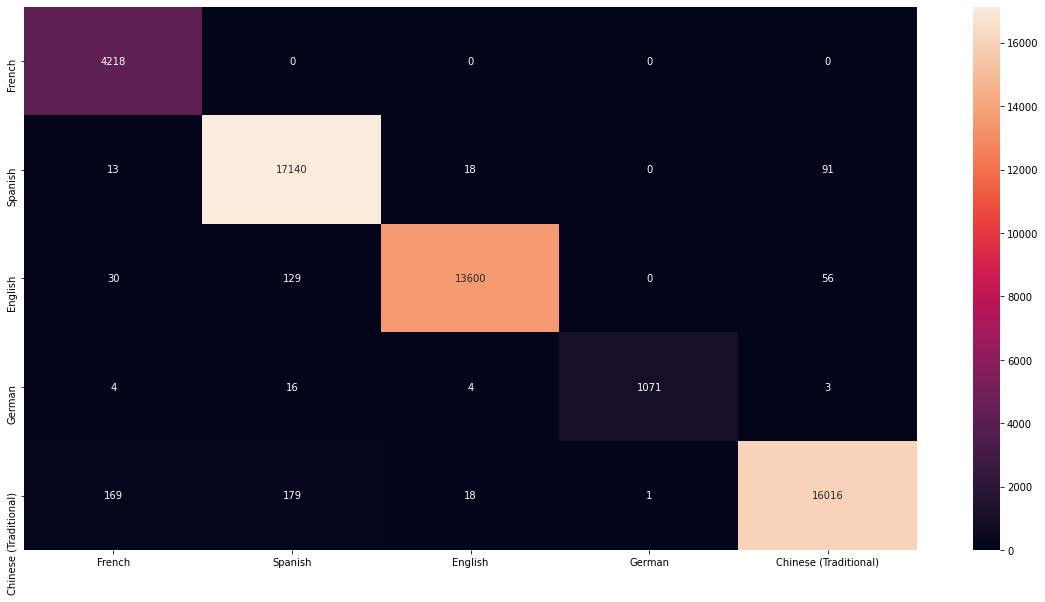

In [58]:
plt.figure(figsize=(20,10))  
sns.heatmap(cm_df, annot=True,fmt='d')

In [59]:
import pickle
#persisit model so that it can be used by different consumers
lrFile =open('LRModel.pckl', 'wb')
pickle.dump(pipe_lr_r13, lrFile)
lrFile.close()

In [60]:
global lrLangDetectModel
lrLangDetectFile =open('LRModel.pckl','rb')
lrLangDetectModel = pickle.load(lrLangDetectFile)
lrLangDetectFile.close()

In [48]:
def lang_detect(text):
    import numpy as np
    import string
    import re
    import pickle
    translate_table=dict((ord(char), None) for char in string.punctuation)
    
    global lrLangDetectModel
    lrLangDetectFile =open('LRModel.pckl','rb')
    lrLangDetectModel = pickle.load(lrLangDetectFile)
    lrLangDetectFile.close()
    
    text=" ".join(text.split())
    text=text.lower()
    text =re.sub(r"\d+","",text)
    text=text.translate(translate_table)
    pred =lrLangDetectModel.predict([text])
    prob = lrLangDetectModel.predict_proba([text])
    return pred[0]
    

In [67]:
lang_detect("boy")

'English'

In [64]:
lang_detect("Bonjour")

'French'

In [65]:
lang_detect("una casa pequeña")

'Spanish'

In [68]:
lang_detect("und es wird")

'German'

In [69]:
lang_detect("成功的女运动员们并非是在印度唯")

'Chinese (Traditional)'